In [3]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

2.7.13 |Anaconda 4.3.0 (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]
1.11.3
0.19.2


In [7]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 6C28-BA93

 Directory of C:\Users\Mo.Pei\Desktop\data2\Python_Prac

04/21/2017  02:11 PM    <DIR>          .
04/21/2017  02:11 PM    <DIR>          ..
04/21/2017  09:52 AM    <DIR>          .ipynb_checkpoints
03/29/2017  12:07 PM             2,332 1_Data_Analysis_Panda_NdArray_IpythonNotebook.ipynb
04/11/2017  12:21 PM            40,478 2_Data_Analysis_Panda_3 - NumPy Basics.ipynb
04/13/2017  05:50 PM            61,200 2_Data_Analysis_Panda_3 - NumPy_Vectorization_Multiarray.ipynb
04/21/2017  11:19 AM           295,076 2_Data_Analysis_Panda_4_Pandas Intros to File IO, Plotting, Stats and Joins .ipynb
04/21/2017  02:11 PM             1,217 2_Data_Analysis_Panda_4_Pandas Renaming Cols, Handling NaN Values.ipynb
04/18/2017  11:07 AM           109,760 2_Data_Analysis_Panda_4_Pandas_Basics.ipynb
03/30/2017  03:29 PM             7,981 2_Data_Analysis_Panda_NdArray_Map.ipynb
04/14/2017  09:52 AM    <DIR>          data_analysis_with_pyt

In [50]:
import os
os.getcwd()
os.chdir('C:\Users\Mo.Pei\Desktop\data2\Python_Prac\data_analysis_with_python_and_pandas-master\data')

In [9]:
os.getcwd()

'C:\\Users\\Mo.Pei\\Desktop\\data2\\Python_Prac\\data_analysis_with_python_and_pandas-master\\data'

In [58]:
df=pd.read_csv('date_fixed_running_data.csv')

In [59]:
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [60]:
df.columns

Index([u'Unnamed: 0', u'Miles', u'Time'], dtype='object')

In [61]:
df.dtypes

Unnamed: 0     object
Miles         float64
Time           object
dtype: object

In [62]:
df['Unnamed: 0'].head()

0    2014-08-02
1    2014-08-03
2    2014-08-04
3    2014-08-05
4    2014-08-06
Name: Unnamed: 0, dtype: object

In [63]:
df = pd.read_csv('date_fixed_running_data.csv', parse_dates=['Date'])

ValueError: 'Date' is not in list

In [64]:
df = pd.read_csv('date_fixed_running_data.csv', parse_dates=[0])

In [65]:
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [66]:
df.dtypes

Unnamed: 0    datetime64[ns]
Miles                float64
Time                  object
dtype: object

In [40]:
df.columns

Index([u'Unnamed: 0', u'Miles', u'Time'], dtype='object')

In [67]:
cols=['Date','Miles','Time']
df.columns=cols
df.head()

,Date,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [42]:
df.head()

,Date,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [43]:
df.rename(columns={df.columns[0]:'Date'},inplace=True)

In [44]:
df.head()

,Date,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [45]:
df.set_index('Date',inplace=True)

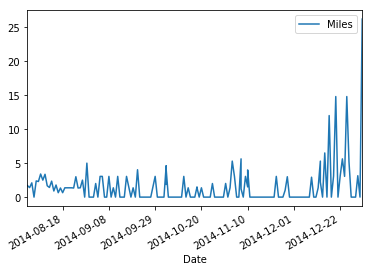

In [47]:
df.plot()

In [71]:
raw_time_fmt=df.Time[0]

In [73]:
def get_total_seconds(raw_time):
    if raw_time is np.nan:
        return np.nan
    hrs,mins,seconds = str(raw_time).split(':')
    seconds = int(seconds)+60*int(mins)+60*60*int(hrs)
    return seconds
print(get_total_seconds(raw_time_fmt))

nan


In [77]:
df['Seconds']=df.Time.map(get_total_seconds)

In [79]:
df.head(10)

,Date,Miles,Time,Seconds
0,2014-08-02,1.70,NaN,NaN
1,2014-08-03,1.40,NaN,NaN
2,2014-08-04,2.10,NaN,NaN
3,2014-08-05,0.00,NaN,NaN
4,2014-08-06,2.38,NaN,NaN
5,2014-08-07,2.30,NaN,NaN
6,2014-08-08,3.40,NaN,NaN
7,2014-08-09,2.50,NaN,NaN
8,2014-08-10,3.36,0:28:37,1717.0
9,2014-08-11,1.67,0:13:07,787.0


### pandas notnull isnull functions to get rid of null value 
- http://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html
- http://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html

In [93]:
df[pd.notnull(df['Seconds'] )].head()

,Date,Miles,Time,Seconds
8,2014-08-10,3.36,0:28:37,1717.0
9,2014-08-11,1.67,0:13:07,787.0
10,2014-08-12,1.42,0:10:35,635.0
11,2014-08-13,2.35,0:17:25,1045.0
12,2014-08-14,0.90,0:06:16,376.0


In [94]:
df.describe()

,Miles,Seconds
count,166.000000,52.000000
mean,1.530964,1901.788462
std,2.979802,2560.424171
min,0.000000,376.000000
25%,0.000000,583.750000
50%,0.000000,1343.500000
75%,2.007500,1743.250000
max,26.200000,15643.000000


In [96]:
df.fillna(0).describe()

,Miles,Seconds
count,166.000000,166.000000
mean,1.530964,595.740964
std,2.979802,1676.040290
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.007500,561.750000
max,26.200000,15643.000000


In [98]:
df['Minutes']=df['Seconds'].map(lambda x: x/60)

In [100]:
df.describe()

,Miles,Seconds,Minutes
count,166.000000,52.000000,52.000000
mean,1.530964,1901.788462,31.696474
std,2.979802,2560.424171,42.673736
min,0.000000,376.000000,6.266667
25%,0.000000,583.750000,9.729167
50%,0.000000,1343.500000,22.391667
75%,2.007500,1743.250000,29.054167
max,26.200000,15643.000000,260.716667


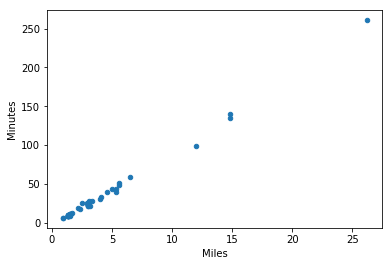

In [102]:
df.plot(x='Miles',y='Minutes',kind='scatter')

Let’s plot Miles and Minutes together in a scatter plot. Wow that’s linear. Let’s see how correlated they are. We do this with the cor method. We can see that Miles to time are very tightly correlated (using pearson standard correlation coefficients) there are two other correlation methods that you can use, kendall Tau, and Spearman rank correlation.

In [104]:
df.corr()

,Miles,Seconds,Minutes
Miles,1.000000,0.997203,0.997203
Seconds,0.997203,1.000000,1.000000
Minutes,0.997203,1.000000,1.000000


In [106]:
df.corr(method='kendall')

,Miles,Seconds,Minutes
Miles,1.00000,0.88305,0.88305
Seconds,0.88305,1.00000,1.00000
Minutes,0.88305,1.00000,1.00000


In [108]:
df.corr(method='spearman')

,Miles,Seconds,Minutes
Miles,1.00000,0.96482,0.96482
Seconds,0.96482,1.00000,1.00000
Minutes,0.96482,1.00000,1.00000



Now let’s see a box plot. With these two we get a much better idea of the data. We can see that most of my runs are below an hour except for a couple that are much longer.-

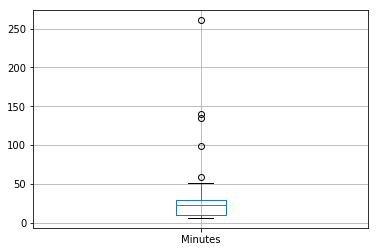

In [110]:
df.boxplot('Minutes',return_type='axes')

In [112]:
df['Minutes']/df['Miles']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8       8.516865
9       7.854291
10      7.453052
11      7.411348
12      6.962963
13      6.962963
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20      6.970803
21      6.861314
22      6.630170
23           NaN
24           NaN
25      6.508516
26           NaN
27      7.664234
28     10.000000
29           NaN
         ...    
136          NaN
137          NaN
138          NaN
139          NaN
140          NaN
141     8.532423
142          NaN
143          NaN
144     6.751825
145     8.226415
146     8.589744
147          NaN
148     9.033333
149          NaN
150     8.250000
151          NaN
152     8.467742
153     9.121622
154          NaN
155     9.032258
156     9.206631
157     8.240437
158     9.459459
159          NaN
160          NaN
161          NaN
162          NaN
163     7.0370

In [113]:
df['Min_per_mile']=df['Minutes']/df['Miles']

In [115]:
df.describe()

,Miles,Seconds,Minutes,Min_per_mile
count,166.000000,52.000000,52.000000,52.000000
mean,1.530964,1901.788462,31.696474,7.725297
std,2.979802,2560.424171,42.673736,0.954475
min,0.000000,376.000000,6.266667,6.000000
25%,0.000000,583.750000,9.729167,7.020479
50%,0.000000,1343.500000,22.391667,7.533333
75%,2.007500,1743.250000,29.054167,8.480023
max,26.200000,15643.000000,260.716667,10.000000


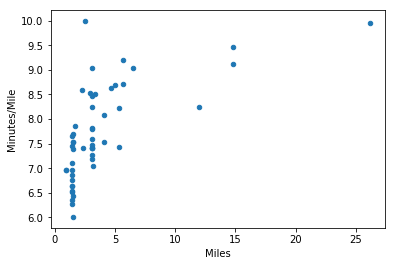

In [117]:
df.plot(x='Miles',y='Min_per_mile',kind='scatter')
plt.ylabel('Minutes/Mile')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D922048>]], dtype=object)

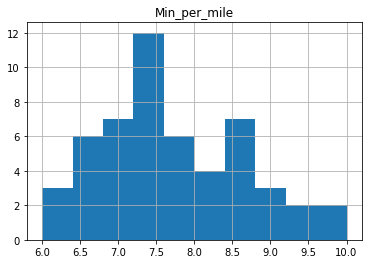

In [119]:
df.hist('Min_per_mile')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E6C7B00>]], dtype=object)

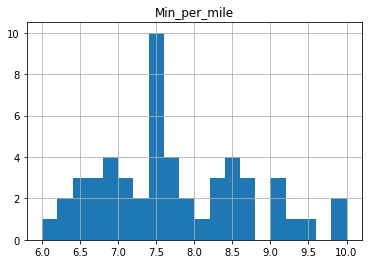

In [127]:
df.hist('Min_per_mile',bins=20)

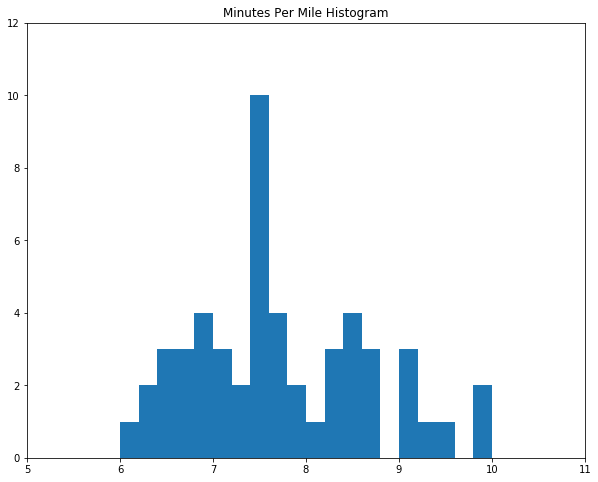

In [125]:
df.hist('Min_per_mile',bins=20,figsize=(10,8))
plt.xlim(5,11)
plt.ylim(0,12)
plt.title('Minutes Per Mile Histogram')
plt.grid(False)
plt.savefig('../assets/minutes_per_mile_histogram.png')

In [129]:
df['Miles']

0       1.70
1       1.40
2       2.10
3       0.00
4       2.38
5       2.30
6       3.40
7       2.50
8       3.36
9       1.67
10      1.42
11      2.35
12      0.90
13      0.90
14      1.78
15      0.65
16      1.34
17      0.65
18      1.37
19      1.37
20      1.37
21      1.37
22      1.37
23      1.34
24      3.00
25      1.37
26      1.34
27      1.37
28      2.50
29      0.00
       ...  
136     0.00
137     0.00
138     0.00
139     0.00
140     0.00
141     2.93
142     0.00
143     0.00
144     1.37
145     5.30
146     2.21
147     0.00
148     6.50
149     0.00
150    12.00
151     0.00
152     3.10
153    14.80
154     0.00
155     3.10
156     5.63
157     3.05
158    14.80
159     5.20
160     0.00
161     0.00
162     0.00
163     3.15
164     0.00
165    26.20
Name: Miles, dtype: float64

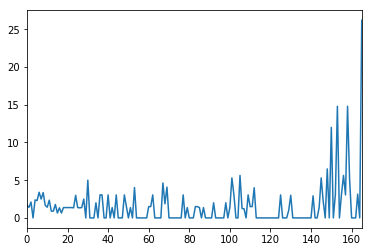

In [132]:
df.Miles.plot()

In [137]:
df.Miles.tail()

161     0.00
162     0.00
163     3.15
164     0.00
165    26.20
Name: Miles, dtype: float64

In [139]:
pd.rolling_mean(df['Miles'],2).tail()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  if __name__ == '__main__':


161    1.332268e-15
162    1.332268e-15
163    1.575000e+00
164    1.575000e+00
165    1.310000e+01
Name: Miles, dtype: float64

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  from ipykernel import kernelapp as app


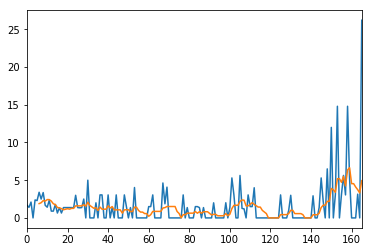

In [140]:
df['Miles'].plot()
pd.rolling_mean(df['Miles'],7).plot()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  from ipykernel import kernelapp as app


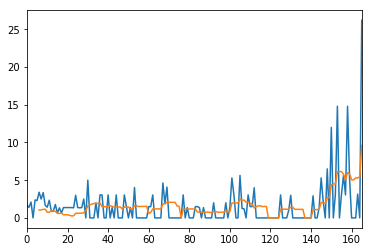

In [141]:
df['Miles'].plot()
pd.rolling_std(df['Miles'],7).plot()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).sum()
  from ipykernel import kernelapp as app


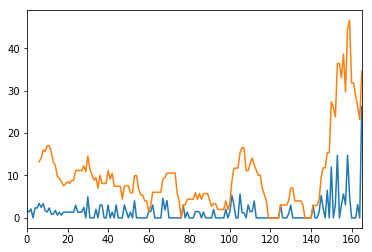

In [142]:
df['Miles'].plot()
pd.rolling_sum(df['Miles'],7).plot()

In [156]:
df.set_index('Date',inplace=True)

In [157]:
[ i for i in df.index]

[Timestamp('2014-08-02 00:00:00'),
 Timestamp('2014-08-03 00:00:00'),
 Timestamp('2014-08-04 00:00:00'),
 Timestamp('2014-08-05 00:00:00'),
 Timestamp('2014-08-06 00:00:00'),
 Timestamp('2014-08-07 00:00:00'),
 Timestamp('2014-08-08 00:00:00'),
 Timestamp('2014-08-09 00:00:00'),
 Timestamp('2014-08-10 00:00:00'),
 Timestamp('2014-08-11 00:00:00'),
 Timestamp('2014-08-12 00:00:00'),
 Timestamp('2014-08-13 00:00:00'),
 Timestamp('2014-08-14 00:00:00'),
 Timestamp('2014-08-14 00:00:00'),
 Timestamp('2014-08-15 00:00:00'),
 Timestamp('2014-08-16 00:00:00'),
 Timestamp('2014-08-17 00:00:00'),
 Timestamp('2014-08-18 00:00:00'),
 Timestamp('2014-08-19 00:00:00'),
 Timestamp('2014-08-19 00:00:00'),
 Timestamp('2014-08-20 00:00:00'),
 Timestamp('2014-08-21 00:00:00'),
 Timestamp('2014-08-22 00:00:00'),
 Timestamp('2014-08-23 00:00:00'),
 Timestamp('2014-08-24 00:00:00'),
 Timestamp('2014-08-25 00:00:00'),
 Timestamp('2014-08-25 00:00:00'),
 Timestamp('2014-08-26 00:00:00'),
 Timestamp('2014-08-

In [158]:
df['2014-11':'2014-12']

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,
2014-11-01,0.00,NaN,NaN,NaN,NaN
2014-11-02,1.37,0:08:43,523.0,8.716667,6.362530
2014-11-03,5.30,0:39:26,2366.0,39.433333,7.440252
2014-11-04,3.05,0:22:12,1332.0,22.200000,7.278689
2014-11-05,0.00,NaN,NaN,NaN,NaN
2014-11-06,0.00,NaN,NaN,NaN,NaN
2014-11-07,5.63,0:49:05,2945.0,49.083333,8.718176
2014-11-07,1.26,NaN,NaN,NaN,NaN
2014-11-07,1.20,NaN,NaN,NaN,NaN


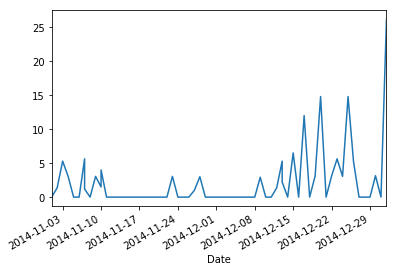

In [159]:
df['2014-11':'2015-1-1']['Miles'].plot()

In [160]:
df['2014-8-12']

KeyError: '2014-8-12'

In [162]:
df.loc['2014-8-12']

Miles              1.42
Time            0:10:35
Seconds             635
Minutes         10.5833
Min_per_mile    7.45305
Name: 2014-08-12 00:00:00, dtype: object

In [164]:
df.head()

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,
2014-08-02,1.70,NaN,NaN,NaN,NaN
2014-08-03,1.40,NaN,NaN,NaN,NaN
2014-08-04,2.10,NaN,NaN,NaN,NaN
2014-08-05,0.00,NaN,NaN,NaN,NaN
2014-08-06,2.38,NaN,NaN,NaN,NaN


In [167]:
df.to_csv('../data/date_fixed_running_data_with_time.csv')

In [168]:
df.to_html('date_fixed_running_data_with_time.html')

In [169]:
df.to_json('/date_fixed_running_data_with_time.json')

ValueError: DataFrame index must be unique for orient='columns'.